In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt


In [2]:
'''
Create squareWave depend on range amp and its tau, even period
'''
def squareWave(x, amp_high = 1, amp_low = 0, tau = 4, period = 10):
    T = period
    left_period = (-T/2)
    tau_left  = -tau/2
    tau_right = tau/2
    tau_midle = 0
    right_period = (T/2)
    cache = (amp_high, amp_low, tau, period)
    while True:
        # set value of amplitude depend on x and period follow time
        if ((x >= left_period) and (x <= tau_left)) or ((x >= tau_right) and (x <= right_period)):
            return amp_low, cache
        elif((x >= tau_left) and (x <= tau_midle)) or ((x >= tau_midle) and (x<= tau_right)):
            return amp_high, cache
        else:
            # Shift all the signal to left and right follow x
            if (x<=0):
                left_period -= T
                tau_left -= T
                tau_right -= T
                right_period -= T
            else:
                left_period += T
                tau_left += T
                tau_right += T
                right_period += T



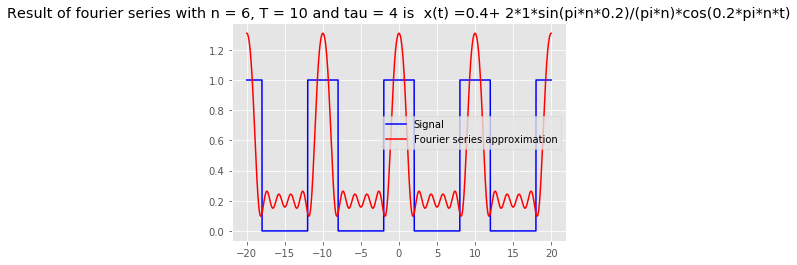

In [48]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Setup
x_ = np.linspace(-20,20,10000)

t = 4
T = 10
n = 6

def ao(cache):
    amp_high, amp_low, tau, period = cache
    return (amp_high*tau)/period

def an(cache, n):
    amp_high, amp_low, tau, period = cache
    return ((amp_high*np.sin(np.pi*n*(1/period)*tau/2))/(np.pi*n))

def bn(cache, n):
    amp_high, amp_low, tau, period = cache
    return 0

def fourier_series(x,n,cache):
    amp_high, amp_low, tau, period = cache
    f = 1/period
    a0 = ao(cache)
    my_f = 0
    for i in range(1,int(n+1)):
        my_f += (an(cache,i)*np.cos(2*np.pi*i*f*x))
    my_f = a0 + 2*my_f    
    return my_f

def print_fourier_serier(cache):
    amp_high, amp_low, tau, period = cache
    a0 = ao(cache)
    a_n = (amp_high*np.sin(np.pi*n*(1/period)*tau/2))/(np.pi*n)
    a_n = str(amp_high) + '*sin(pi*n*' +str((1/period)*tau/2) + ')/(pi*n)*cos('+str(2/period)+'*pi*n*t)'
    return ('x(t) =' +str(a0) + '+ 2*'+ a_n)

y = []
f = []
signal = 0
for i in x_:
    signal, cache = squareWave(i, amp_high = 1, amp_low = 0, tau = t, period = T)
    y.append(signal)
    f.append(fourier_series(i,n,cache))


plt.plot(x_,y,color="blue",label="Signal")
plt.plot(x_,f,color="red",label="Fourier series approximation")
plt.title("Result of fourier series with n = {}, T = {} and tau = {} is  ".format(n,T,t) + print_fourier_serier(cache))
plt.legend()
plt.show()

In [35]:
print_fourier_serier(cache)

0.4+ 2*1*sin(pi*n*0.2)/(pi*n)


In [30]:
s.sigma_approximation(3)

40*sin(pi*x/20)*sinc(pi/3)/pi - 20*sin(pi*x/10)*sinc(2*pi/3)/pi